In [0]:
%tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding dropout layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model using Dropout</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# If using Google Collab to run the code.

#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
# If using Google Collab to run the code.

#!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [5]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [9]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [10]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Adding dropout layer(s)</ol>

In [11]:
# importing the dropout layer
from keras.layers import Dropout

In [12]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [13]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

C:\Users\lenovo\env\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model using Dropout

In [15]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 22s 557ms/step - loss: 0.7694 - accuracy: 0.4988 - val_loss: 0.6937 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 5s 349ms/step - loss: 0.7362 - accuracy: 0.5474 - val_loss: 0.6777 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 2s 176ms/step - loss: 0.7262 - accuracy: 0.5419 - val_loss: 0.6676 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 2s 167ms/step - loss: 0.7186 - accuracy: 0.5401 - val_loss: 0.6594 - val_accuracy: 0.5836
Epoch 5/100
13/13 [==============================] - 2s 166ms/step - loss: 0.7092 - accuracy: 0.5553 - val_loss: 0.6502 - val_accuracy: 0.6445
Epoch 6/100
13/13 [==============================] - 4s 349ms/step - loss: 0.6983 - accuracy: 0.5735 - val_loss: 0.6454 - val_accuracy: 0.6445
Epoch 7/100
13/13 [==============================] - 2s 193ms/step - loss: 0.7032 - accuracy: 0.5601 - val_loss: 0.6408 - val_accuracy: 0.664

Epoch 58/100
13/13 [==============================] - 2s 175ms/step - loss: 0.5854 - accuracy: 0.7060 - val_loss: 0.5711 - val_accuracy: 0.7082
Epoch 59/100
13/13 [==============================] - 2s 177ms/step - loss: 0.5821 - accuracy: 0.7096 - val_loss: 0.5770 - val_accuracy: 0.7040
Epoch 60/100
13/13 [==============================] - 2s 177ms/step - loss: 0.5822 - accuracy: 0.7029 - val_loss: 0.5698 - val_accuracy: 0.7110
Epoch 61/100
13/13 [==============================] - 2s 178ms/step - loss: 0.5912 - accuracy: 0.6932 - val_loss: 0.5776 - val_accuracy: 0.7054
Epoch 62/100
13/13 [==============================] - 2s 175ms/step - loss: 0.5835 - accuracy: 0.7078 - val_loss: 0.5726 - val_accuracy: 0.7181
Epoch 63/100
13/13 [==============================] - 2s 178ms/step - loss: 0.5639 - accuracy: 0.7254 - val_loss: 0.5744 - val_accuracy: 0.7068
Epoch 64/100
13/13 [==============================] - 2s 177ms/step - loss: 0.5792 - accuracy: 0.7041 - val_loss: 0.5675 - val_accuracy:

## 7. Evaluating model performance 

In [16]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(706,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

23/23 [==============================] - 1s 24ms/step


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6488\1715179869.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [17]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, prediction_int), '%')

Accuracy on validation set: 0.7124645892351275 %


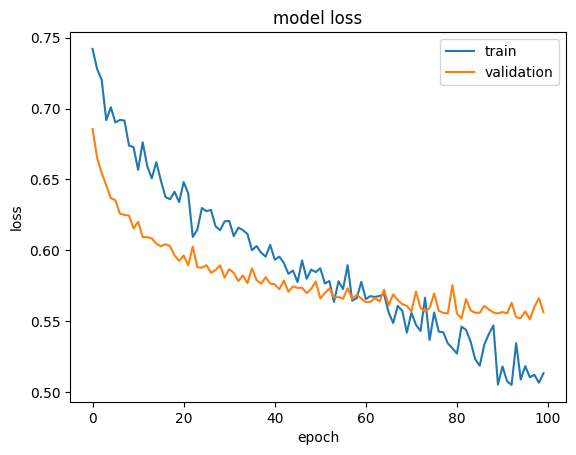

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1pEBFo1GkfKsvWtKTKinqYVSxOGy1M4ie)